In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

# Playing with a Gaussian function



(100,) (100,)
mean is  0.0030807711244133992
std is  1.4066909812081967


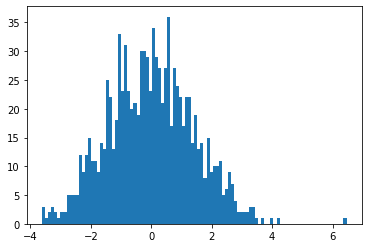

In [2]:
mu = 0
sigma = np.sqrt(2)
r = np.random.normal(mu, sigma, size=1000)
yr, xr = np.histogram(r,bins=100)

xr = xr[:-1]
print(xr.shape, yr.shape)
print('mean is ', np.mean(r))
print('std is ', np.std(r))

plt.hist(r,bins=100);

In [3]:
def gaussian_model(x, a, b, c, d):
    y = a*np.exp(-np.power(x-b,2)/2/c**2) + d    
    return y

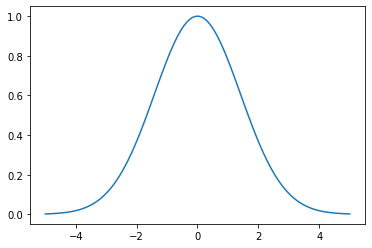

In [4]:
# test plotting of a gaussian curve with arbitrary variables 
x = np.linspace(-5,5,100)
a = 1
b = 0
c = np.sqrt(2)
d = 0
y = gaussian_model(x,a,b,c,d)

plt.plot(x,y)

[27.99667034 -0.07746464  1.4682314  -0.15312861]
[[ 7.83980687e-01  7.77408037e-04 -2.12717197e-03 -2.70446006e-01]
 [ 7.77408037e-04  2.12177795e-03  3.46717545e-05 -8.09148700e-04]
 [-2.12717197e-03  3.46717545e-05  3.81737958e-03 -2.43119974e-02]
 [-2.70446006e-01 -8.09148700e-04 -2.43119974e-02  3.57083052e-01]]


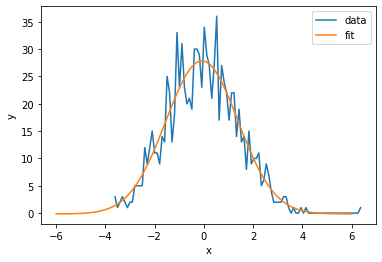

In [5]:
from scipy.optimize import curve_fit 
from sklearn.metrics import r2_score 


popt, pcov = curve_fit(gaussian_model, xr, yr)
print(popt)
print(pcov)

x = np.linspace(-6,6,100)
yfit = gaussian_model(x, popt[0],popt[1],popt[2],popt[3])
plt.plot(xr, yr, label='data')
plt.plot(x,yfit, label='fit')

plt.legend(loc='best')
plt.ylabel('y')
plt.xlabel('x')
plt.show()



In [6]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(yfit - yr)))
print("Residual sum of squares (MSE): %.2f" % np.mean((yfit - yr) ** 2))
print("R2-score: %.2f" % r2_score(yfit , yr) )


Mean absolute error: 7.47
Residual sum of squares (MSE): 99.25
R2-score: -0.03
